In [1]:
import os
import sys
import argparse
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import scanpy as sc
import gseapy as gp

/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecat

In [2]:
print("Load wound data")
wound_fn = pathlib.Path(
    "/Users/z5493368/PhD/projects/Neutrophil Arnolda/scripts/wound_with_clusternames.h5ad"
)
adata_wound = anndata.read_h5ad(wound_fn)


Load wound data


In [3]:
adata_wound

AnnData object with n_obs × n_vars = 11036 × 25223
    obs: 'time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'leiden', 'cell_type'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'time_point_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
   

In [4]:
plt.ion()

Take a look at the UMAP first


/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


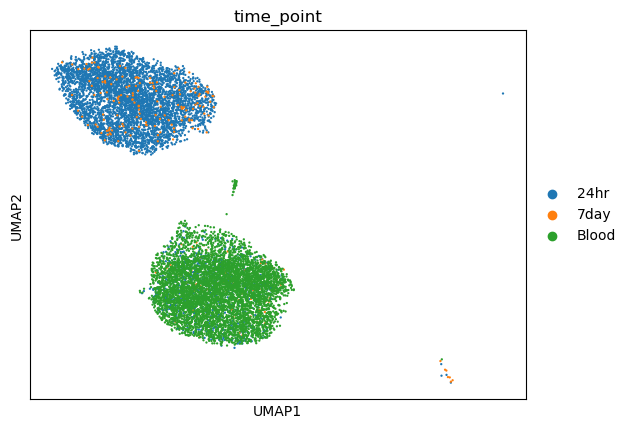

In [5]:
print("Take a look at the UMAP first")
fig, ax = plt.subplots()
sc.pl.umap(adata_wound, color="time_point", ax=ax)
fig.tight_layout()
plt.show()

In [6]:
print("Eliminate weird cells that are far away from everybody for now")
x, y = adata_wound.obsm["X_umap"].T
idx = adata_wound.obs_names[((x < 12) & ((y < 6.45) | (y > 9))).nonzero()[0]]
adata_wound = adata_wound[idx]

Eliminate weird cells that are far away from everybody for now


Take a look at the UMAP afetr removing weird cells


/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


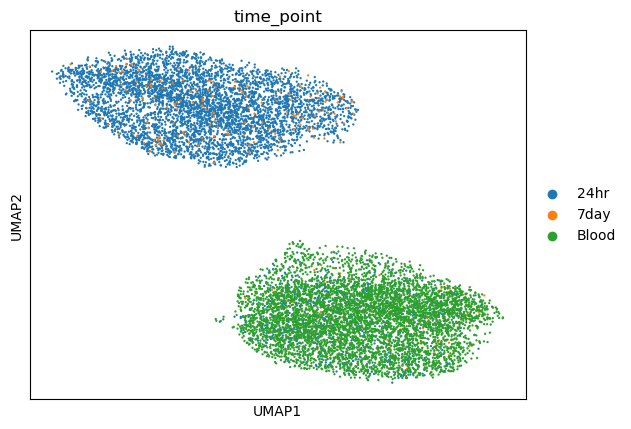

In [7]:
print("Take a look at the UMAP afetr removing weird cells")
fig, ax = plt.subplots()
sc.pl.umap(adata_wound, color="time_point", ax=ax)
fig.tight_layout()
plt.show()

In [8]:
print("Split in two clusters")
adata_wound.obs["broad_neutro_type"] = adata_wound.obsm["X_umap"][:, 1] > 8
adata_wound.obs["broad_neutro_type"] = adata_wound.obs["broad_neutro_type"].map(
    {False: "blood-like", True: "tissue-specific"}
)
adata_wound.obs["broad_neutro_type"] = pd.Categorical(
    adata_wound.obs["broad_neutro_type"]
)

Split in two clusters


/var/folders/_7/r8gs18kn75j63_mpkbm26sx40000gp/T/ipykernel_74177/460423115.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_wound.obs["broad_neutro_type"] = adata_wound.obsm["X_umap"][:, 1] > 8


In [9]:
adata_wound.obs

,time_point,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_counts,n_genes,doublet_scores,predicted_doublets,leiden,cell_type,broad_neutro_type
Wound_56_1,24hr,874,6.774224,4393,8.387995,50.899158,62.212611,74.527658,91.486456,98,...,0,0.000000,0.000000,4393,874,0.009360,False,1,Neutrophils,tissue-specific
Wound_65_1,24hr,1520,7.327123,4938,8.504918,27.521264,36.978534,50.324018,72.235723,28,...,0,0.000000,0.000000,4938,1520,0.081721,False,0,Neutrophils,blood-like
Wound_67_1,24hr,750,6.621406,2283,7.733684,36.224266,49.102059,65.440210,89.049496,3,...,1,0.693147,0.043802,2283,750,0.011025,False,1,Neutrophils,tissue-specific
Wound_413_1,24hr,831,6.723832,2228,7.709308,33.662478,45.960503,61.445242,85.143627,20,...,0,0.000000,0.000000,2228,831,0.102575,False,1,Neutrophils,tissue-specific
Wound_420_1,24hr,1170,7.065613,5006,8.518592,36.675989,49.660408,63.503795,83.120256,48,...,0,0.000000,0.000000,5006,1170,0.066428,False,1,Neutrophils,tissue-specific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wound_56526610_2,Blood,1230,7.115582,2737,7.914983,30.836682,40.189989,52.685422,73.328462,3,...,0,0.000000,0.000000,2737,1230,0.072690,False,0,Neutrophils,blood-like
Wound_56538996_2,Blood,1090,6.994850,2962,7.993958,37.035787,46.792708,58.980419,80.081026,12,...,0,0.000000,0.000000,2962,1090,0.024130,False,0,Neutrophils,blood-like
Wound_56550234_2,Blood,1447,7.277939,3266,8.091627,23.698714,33.251684,45.529700,67.452541,8,...,0,0.000000,0.000000,3266,1447,0.058313,False,0,Neutrophils,blood-like
Wound_56576762_2,Blood,1326,7.190676,2947,7.988882,24.635222,34.747201,47.879199,70.376654,12,...,0,0.000000,0.000000,2947,1326,0.051424,False,0,Neutrophils,blood-like


Take a look at the UMAP coloured by time_point


/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


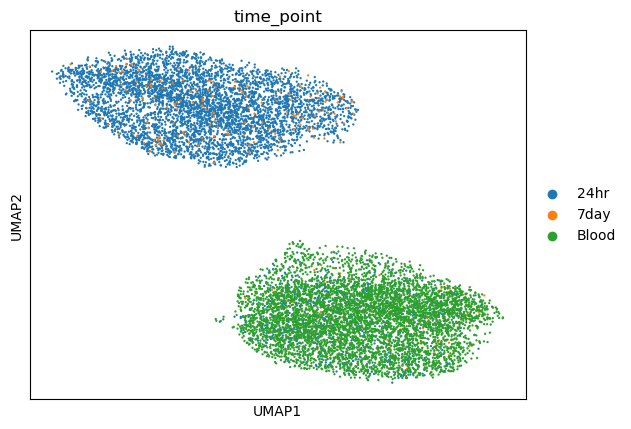

In [10]:
print("Take a look at the UMAP coloured by time_point")
fig, ax = plt.subplots()
sc.pl.umap(adata_wound, color="time_point", ax=ax)
fig.tight_layout()
plt.show()

/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


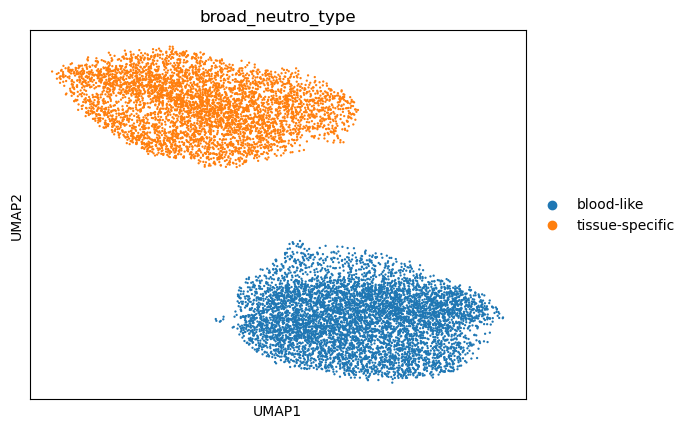

In [11]:

fig, ax = plt.subplots()
sc.pl.umap(adata_wound, color="broad_neutro_type", ax=ax)
fig.tight_layout()
plt.show()

In [12]:
print("Cross-abundance table")
counts = (
    adata_wound.obs.groupby(["time_point", "broad_neutro_type"])
    .size()
    .unstack(0, fill_value=0)
)
fracs = 1.0 * counts / counts.sum(axis=0)

Cross-abundance table


/var/folders/_7/r8gs18kn75j63_mpkbm26sx40000gp/T/ipykernel_74177/1656676923.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_wound.obs.groupby(["time_point", "broad_neutro_type"])


In [13]:
counts

time_point,24hr,7day,Blood
broad_neutro_type,,,
blood-like,817,105,5406
tissue-specific,4507,153,0


Plot time cours of cross-abundance


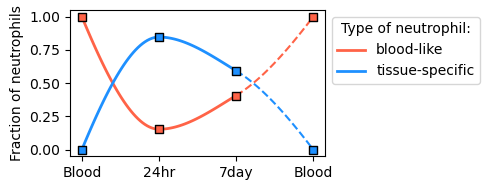

In [14]:
from scipy.interpolate import pchip_interpolate

print("Plot time cours of cross-abundance")
fig, ax = plt.subplots(figsize=(5, 2))
palette = {
    "blood-like": "tomato",
    "tissue-specific": "dodgerblue",
}
xticklabels = ["Blood", "24hr", "7day", "Blood"]
x = np.arange(len(xticklabels))
xint = np.linspace(x[0], x[-1], 100)
for key in palette:
    y = fracs.loc[key, xticklabels].values
    yint = pchip_interpolate(x, y, xint)
    xint1 = xint[xint < x[-2]]
    yint1 = yint[xint < x[-2]]
    xint2 = xint[xint >= x[-2]]
    yint2 = yint[xint >= x[-2]]
    ax.plot(
        xint1,
        yint1,
        color=palette[key],
        lw=2,
        label=key,
    )
    ax.plot(
        xint2,
        yint2,
        color=palette[key],
        lw=1.5,
        ls="--",
    )
    ax.scatter(
        x,
        y,
        edgecolor="k",
        lw=1,
        facecolor=palette[key],
        s=30,
        marker="s",
        zorder=6,
    )
ax.set_xticks(x)
ax.set_xticklabels(xticklabels)
ax.set_ylabel("Fraction of neutrophils")
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1),
    bbox_transform=ax.transAxes,
    title="Type of neutrophil:",
)
fig.tight_layout()

In [15]:
print("Differential expression between two types of neutrophils")
# NOTE: the data is already log-transformed, as you can see by adata_wound.X.max() ~ 10
sc.tl.rank_genes_groups(adata_wound, groupby="broad_neutro_type", method="wilcoxon")
# Extract DEGs
tmp = adata_wound.uns["rank_genes_groups"]
upreg = pd.DataFrame(
    index=[x[1] for x in tmp["names"]],
    data={
        "score": [x[1] for x in tmp["scores"]],
        "pval": [x[1] for x in tmp["pvals"]],
        "pval_adj": [x[1] for x in tmp["pvals_adj"]],
        "logFC": [x[1] for x in tmp["logfoldchanges"]],
    },
)
print("Check which one is which")
top_up = upreg.index[0]
xbl = adata_wound[
    adata_wound.obs["broad_neutro_type"] == "blood-like", top_up
].X.mean()
xts = adata_wound[
    adata_wound.obs["broad_neutro_type"] != "blood-like", top_up
].X.mean()
print(f'{top_up} is supposed to be "up": blood-like {xbl}, tissue-specific {xts}')
print("  (Up means up in tissue-specific)")

Differential expression between two types of neutrophils


/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Check which one is which
Cd14 is supposed to be "up": blood-like 0.1489020586013794, tissue-specific 3.128326892852783
  (Up means up in tissue-specific)


In [16]:
print("Pathway analysis")
print(" Downregulated in tissue-specific neutros")
enr_dwn = gp.enrichr(
    gene_list=list(upreg.index[::-1][:150]),
    gene_sets=["KEGG_2019_Mouse", "GO_Biological_Process_2023"],
    organism="mouse",
    outdir=None,
)
print(" Upregulated in tissue-specific neutros")
enr_up = gp.enrichr(
    gene_list=list(upreg.index[:150]),
    gene_sets=["KEGG_2019_Mouse", "GO_Biological_Process_2023"],
    organism="mouse",
    outdir=None,
)
dwn_pathways = enr_dwn.results.query(
    "Gene_set == 'GO_Biological_Process_2023'"
).nsmallest(10, "Adjusted P-value")
dwn_pathways = dwn_pathways.loc[dwn_pathways["Adjusted P-value"] < 0.05]

up_pathways = enr_up.results.query(
    "Gene_set == 'GO_Biological_Process_2023'"
).nsmallest(10, "Adjusted P-value")
up_pathways = up_pathways.loc[up_pathways["Adjusted P-value"] < 0.05]


Pathway analysis
 Downregulated in tissue-specific neutros
 Upregulated in tissue-specific neutros


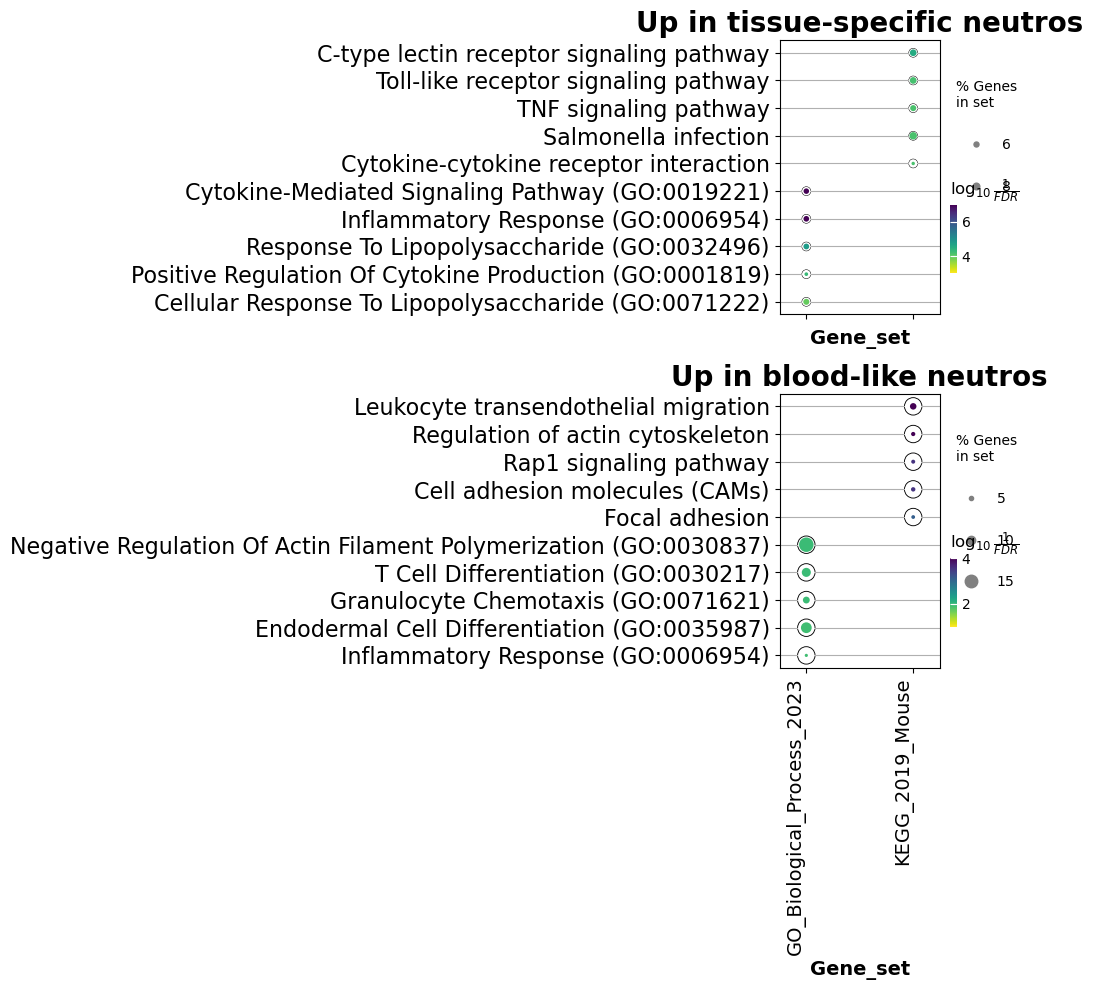

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
gp.dotplot(
    enr_up.results,
    column="Adjusted P-value",
    x="Gene_set",
    size=10,
    top_term=5,
    figsize=(3, 5),
    title="Up in tissue-specific neutros",
    xticklabels_rot=90,  # rotate xtick labels
    show_ring=True,
    marker="o",
    ax=axs[0],
)
gp.dotplot(
    enr_dwn.results,
    column="Adjusted P-value",
    x="Gene_set",  # set x axis, so you could do a multi-sample/library comparsion
    size=10,
    top_term=5,
    figsize=(3, 5),
    title="Up in blood-like neutros",
    xticklabels_rot=90,
    show_ring=True,
    marker="o",
    ax=axs[1],
)
axs[0].set(xticklabels=[])
fig.tight_layout()

In [18]:
print("Focus on tissue-specific neutros")
adata_ts = adata_wound[adata_wound.obs["broad_neutro_type"] == "tissue-specific"]
# Double ensure there's no blood of any kind in here, just to keep things clean
adata_ts = adata_ts[adata_ts.obs["time_point"] != "Blood"]
print("  Differential expression by time point in tissue-specific neutros")
sc.tl.rank_genes_groups(adata_ts, groupby="time_point", method="wilcoxon")
# Extract DEGs
tmp = adata_ts.uns["rank_genes_groups"]
upreg = pd.DataFrame(
    index=[x[1] for x in tmp["names"]],
    data={
        "score": [x[1] for x in tmp["scores"]],
        "pval": [x[1] for x in tmp["pvals"]],
        "pval_adj": [x[1] for x in tmp["pvals_adj"]],
        "logFC": [x[1] for x in tmp["logfoldchanges"]],
    },
)
print("  Check which one is which")
top_up = upreg.index[0]
x24h = adata_wound[adata_wound.obs["time_point"] == "24hr", top_up].X.mean()
x7d = adata_wound[adata_wound.obs["time_point"] != "24hr", top_up].X.mean()
print(f'{top_up} is supposed to be "up": 24hr {x24h}, 7 days {x7d}')
print("    (Up means up in 7 days)")

print("  Print the top genes, to get an idea")
print("    Upregulated at 7 days vs 1 day:")
print(upreg.iloc[:10])
print("    Downregulated at 7 days vs 1 day:")
print(upreg.iloc[-10:].iloc[::-1])

print("  Pathway analysis within tissue-specific neutros")
dwn_genes = upreg.loc[upreg["score"] < 0].index[::-1][:150]
up_genes = upreg.loc[upreg["score"] > 0].index[:150]
print("  Downregulated at 7 days")
enr_dwn = gp.enrichr(
    gene_list=list(dwn_genes),
    gene_sets=["KEGG_2019_Mouse", "GO_Biological_Process_2023"],
    organism="mouse",
    outdir=None,
)
print("  Upregulated at 7 days")
enr_up = gp.enrichr(
    gene_list=list(up_genes),
    gene_sets=["KEGG_2019_Mouse", "GO_Biological_Process_2023"],
    organism="mouse",
    outdir=None,
)
dwn_pathways = enr_dwn.results.query(
    "Gene_set == 'GO_Biological_Process_2023'"
).nsmallest(10, "Adjusted P-value")
dwn_pathways = dwn_pathways.loc[dwn_pathways["Adjusted P-value"] < 0.05]

up_pathways = enr_up.results.query(
    "Gene_set == 'GO_Biological_Process_2023'"
).nsmallest(10, "Adjusted P-value")
up_pathways = up_pathways.loc[up_pathways["Adjusted P-value"] < 0.05]


Focus on tissue-specific neutros
  Differential expression by time point in tissue-specific neutros


/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/opt/anaconda3/envs/scanpy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


  Check which one is which
Hbb-bs is supposed to be "up": 24hr 0.014347362332046032, 7 days 0.03328649699687958
    (Up means up in 7 days)
  Print the top genes, to get an idea
    Upregulated at 7 days vs 1 day:
            score          pval      pval_adj     logFC
Hbb-bs   8.721365  2.748684e-18  2.311002e-14  6.106547
Fth1     7.129452  1.007695e-12  4.236180e-09  0.733635
Hba-a2   6.867198  6.547503e-12  1.834974e-08  6.166894
Hba-a1   5.828327  5.598567e-09  3.209379e-06  5.466151
Pkm      4.741949  2.116719e-06  4.563249e-04  0.307378
Tgif1    3.764945  1.665859e-04  1.489999e-02  0.771875
Zfp36    3.493342  4.770143e-04  3.314527e-02  0.422171
Ftl1     3.416994  6.331657e-04  4.169801e-02  0.325489
Zfp36l1  3.221251  1.276321e-03  7.393876e-02  0.635534
Ccrl2    3.185415  1.445468e-03  8.120052e-02  0.853885
    Downregulated at 7 days vs 1 day:
             score          pval      pval_adj     logFC
S100a11 -10.464049  1.263387e-25  3.186642e-21 -0.908416
Isg20    -9.089693

In [19]:
tmp

{'params': {'groupby': 'time_point',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('S100a11', 'Hbb-bs'), ('Isg20', 'Fth1'), ('Slfn1', 'Hba-a2'),
            ..., ('Hba-a2', 'Slfn1'), ('Fth1', 'Isg20'),
            ('Hbb-bs', 'S100a11')],
           dtype=[('24hr', 'O'), ('7day', 'O')]),
 'scores': rec.array([(10.464049 ,   8.721365 ), ( 9.089693 ,   7.1294518),
            ( 7.4932275,   6.8671985), ..., (-6.8671985,  -7.4932275),
            (-7.1294518,  -9.089693 ), (-8.721365 , -10.464049 )],
           dtype=[('24hr', '<f4'), ('7day', '<f4')]),
 'pvals': rec.array([(1.26338744e-25, 2.74868448e-18),
            (9.93192669e-20, 1.00769466e-12),
            (6.72001701e-14, 6.54750332e-12), ...,
            (6.54750332e-12, 6.72001701e-14),
            (1.00769466e-12, 9.93192669e-20),
            (2.74868448e-18, 1.26338744e-25)],
           dtype=[('24hr', '<f8'), ('7day', '<f8')]),

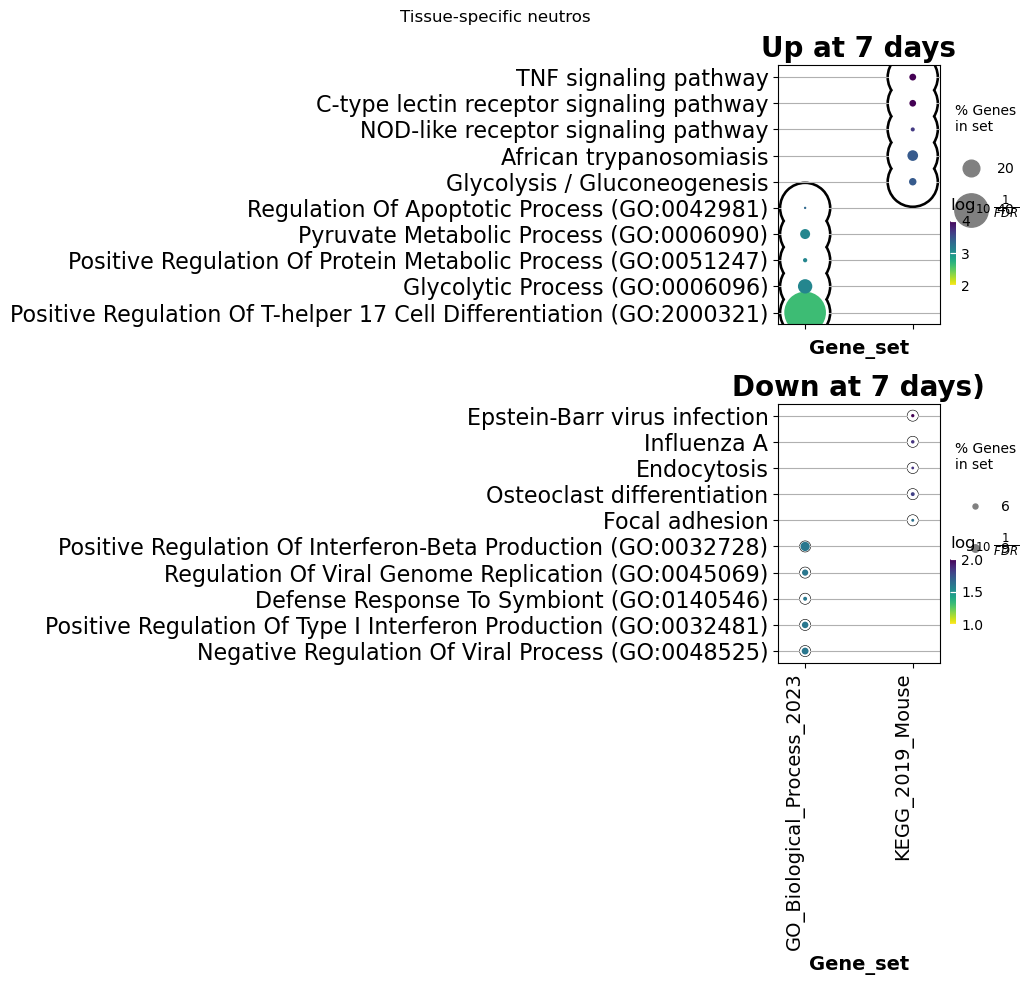

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
gp.dotplot(
    enr_up.results,
    column="Adjusted P-value",
    x="Gene_set",
    size=10,
    top_term=5,
    figsize=(3, 5),
    title="Up at 7 days",
    xticklabels_rot=90,  # rotate xtick labels
    show_ring=True,
    marker="o",
    ax=axs[0],
)
gp.dotplot(
    enr_dwn.results,
    column="Adjusted P-value",
    x="Gene_set",  # set x axis, so you could do a multi-sample/library comparsion
    size=10,
    top_term=5,
    figsize=(3, 5),
    title="Down at 7 days)",
    xticklabels_rot=90,
    show_ring=True,
    marker="o",
    ax=axs[1],
)
axs[0].set(xticklabels=[])
fig.suptitle("Tissue-specific neutros")
fig.tight_layout()